In [1]:
import pandas as pd
import numpy as np
import warnings


In [2]:
warnings.filterwarnings('ignore')
train_data = pd.read_csv("alldata.csv", encoding="windows_1258")
train_data.head(5)

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [3]:
train_data.isnull().sum().sum()

0

In [4]:
train_data.rename(columns={'neutral': 'Sentiment',
                   'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .': 'News'},
          inplace=True, errors='raise')

In [5]:
train_data

,Sentiment,News
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
...,...,...
4840,negative,LONDON MarketWatch -- Share prices ended lower...
4841,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4842,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4843,negative,Net sales of the Paper segment decreased to EU...


In [6]:
pd.set_option('max_colwidth',1800)
train_data[train_data.Sentiment == 1][0:5]

,Sentiment,News


In [7]:
train_data[train_data.Sentiment == 1][0:5]

,Sentiment,News


In [8]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  4845 non-null   object
 1   News       4845 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


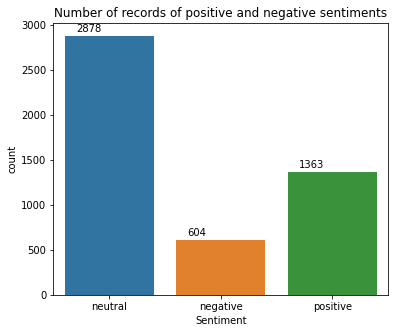

In [9]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
plt.figure(figsize=(6,5))
plt.title("Number of records of positive and negative sentiments")
plot = sn.countplot(x = 'Sentiment', data=train_data)
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x()+0.1 ,p.get_height()+50))


In [10]:
train_data = train_data[train_data.Sentiment != 'neutral']

In [11]:
train_data

,Sentiment,News
1,negative,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported ."
2,positive,With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .
3,positive,"According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales ."
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is aggressively pursuing its growth strategy by increasingly focusing on technologically more demanding HDI printed circuit boards PCBs .
5,positive,"For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m ."
...,...,...
4839,negative,"HELSINKI Thomson Financial - Shares in Cargotec fell sharply in early afternoon trade after the cargo handling group posted a surprise drop in April-June profits , which overshadowed the large number of new orders received during the three months ."
4840,negative,LONDON MarketWatch -- Share prices ended lower in London Monday as a rebound in bank stocks failed to offset broader weakness for the FTSE 100 .
4842,negative,"Operating profit fell to EUR 35.4 mn from EUR 68.8 mn in 2007 , including vessel sales gain of EUR 12.3 mn ."
4843,negative,"Net sales of the Paper segment decreased to EUR 221.6 mn in the second quarter of 2009 from EUR 241.1 mn in the second quarter of 2008 , while operating profit excluding non-recurring items rose to EUR 8.0 mn from EUR 7.6 mn ."


# Creating Count Vectors for Dataset

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
count_vectorize = CountVectorizer()

In [14]:
feature_vector =  count_vectorize.fit(train_data.News)

In [15]:
features = feature_vector.get_feature_names()

In [16]:
print("total number of features: ", len(features))


total number of features:  5501


In [17]:
import random

In [18]:
random.sample(features,10)

['online',
 'currently',
 'sounds',
 'malkia',
 'prohaska',
 'interim',
 'thyssenkrupp',
 '275',
 'frankfurt',
 'chinese']

In [19]:
train_ds_features = count_vectorize.transform(train_data.News)

In [20]:
type(train_ds_features)

scipy.sparse.csr.csr_matrix

In [21]:
train_ds_features.getnnz()

36700

In [22]:
print("Density of the matrix: ", train_ds_features.getnnz()*100/(train_ds_features.shape[0]*train_ds_features.shape[1]))

Density of the matrix:  0.3391720523707526


# Displaying Document Vectors

In [23]:
train_ds_df = pd.DataFrame(train_ds_features.todense())

In [24]:
train_ds_df.columns = features

In [25]:
train_data[0:1]

,Sentiment,News
1,negative,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported ."


# Removing Low_Frequency Words

In [26]:
features_counts = np.sum(train_ds_features.toarray(),axis=0)

In [27]:
features_counts_df = pd.DataFrame(dict(features = features, counts = features_counts))

In [28]:
plt.figure(figsize=(8,6))

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

(array([5.373e+03, 6.700e+01, 1.500e+01, 1.100e+01, 7.000e+00, 6.000e+00,
        3.000e+00, 7.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00]),
 array([   0.,   40.,   80.,  120.,  160.,  200.,  240.,  280.,  320.,
         360.,  400.,  440.,  480.,  520.,  560.,  600.,  640.,  680.,
         720.,  760.,  800.,  840.,  880.,  920.,  960., 1000., 1040.,
        1080., 1120., 1160., 1200., 1240., 1280., 1320., 1360., 1400.,
        1440., 1480., 1520., 1560., 1600., 1640., 1680., 1720., 1760.,
        1800., 1840.,

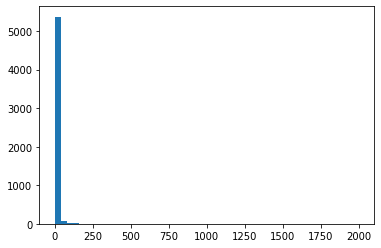

In [29]:
plt.hist(features_counts_df.counts, bins=50, range=(0,2000))

In [30]:
len(features_counts_df[features_counts_df.counts==1])

2922

In [31]:
count_vectorizer =  CountVectorizer(max_features=1000)

In [32]:
feature_vector = count_vectorizer.fit(train_data.News)

In [33]:
features = feature_vector.get_feature_names()

In [34]:
train_ds_features = count_vectorizer.transform(train_data.News)

In [35]:
features_counts =  np.sum(train_ds_features.toarray(),axis=0)

In [36]:
features_counts = pd.DataFrame(dict(features = features, counts = features_counts))

In [37]:
features_counts.sort_values('counts', ascending=False)[0:15]

,features,counts
902,the,2348
464,in,1448
626,of,1293
917,to,1285
125,and,877
351,eur,775
412,from,566
404,for,526
587,mn,465
719,profit,348


# Remove Stop Words

In [38]:
from sklearn.feature_extraction import text

In [39]:
my_stop_words = text.ENGLISH_STOP_WORDS

In [40]:
print("Few stop words: ", list(my_stop_words)[0:10])

Few stop words:  ['often', 'everything', 'how', 'thus', 'bill', 'beforehand', 'go', 'twenty', 'of', 'that']


# Distribution of words Across Different sentiment

In [41]:
train_ds_df = pd.DataFrame(train_ds_features.todense())

In [42]:
train_ds_df.columns = features

In [43]:
train_ds_df['Sentiment'] = train_data.Sentiment

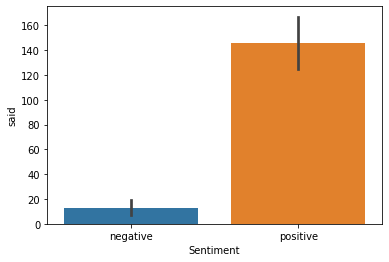

In [44]:
sn.barplot(x = 'Sentiment',y = 'said', data = train_ds_df, estimator= sum)

In [45]:
count_vectorizer =  CountVectorizer(stop_words= my_stop_words, max_features= 2010)

In [46]:
feature_vector =  count_vectorizer.fit(train_data.News)

In [47]:
train_ds_features =  count_vectorizer.transform(train_data.News)

In [48]:
features = feature_vector.get_feature_names()

In [49]:
features_counts = np.sum(train_ds_features.toarray(), axis = 0)

In [50]:
features_counts = pd.DataFrame(dict(features =  features, counts = features_counts))

In [51]:
features_counts.sort_values("counts", ascending= False)[0:15]

,features,counts
609,eur,775
1176,mn,465
1467,profit,348
414,company,341
1998,year,312
1643,said,307
684,finnish,304
1220,net,300
1647,sales,290
1168,million,248


In [52]:
from nltk.stem.snowball import PorterStemmer

In [53]:
stemmer = PorterStemmer()

def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

train_data["News"] = train_data["News"].apply(lambda text: stem_words(text))
train_data.head()
   

,Sentiment,News
1,negative,"the intern electron industri compani elcoteq ha laid off ten of employe from it tallinn facil ; contrari to earlier layoff the compani contract the rank of it offic worker , the daili postime report ."
2,positive,with the new product plant the compani would increas it capac to meet the expect increas in demand and would improv the use of raw materi and therefor increas the product profit .
3,positive,"accord to the compani 's updat strategi for the year 2009-2012 , baswar target a long-term net sale growth in the rang of 20 % -40 % with an oper profit margin of 10 % -20 % of net sale ."
4,positive,financ of aspocomp 's growth aspocomp is aggress pursu it growth strategi by increasingli focus on technolog more demand hdi print circuit board pcb .
5,positive,"for the last quarter of 2010 , componenta 's net sale doubl to eur131m from eur76m for the same period a year earlier , while it move to a zero pre-tax profit from a pre-tax loss of eur7m ."


In [54]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y =  train_test_split(train_ds_features, train_data.Sentiment, 
                                                     test_size = 0.3, random_state = 50)

In [55]:
from sklearn.naive_bayes import BernoulliNB
nb_clf = BernoulliNB()
nb_clf.fit(train_x.toarray(), train_y)

BernoulliNB()

In [56]:
test_ds_predicted = nb_clf.predict(test_x.toarray())

In [57]:
from sklearn import metrics
print(metrics.classification_report(test_y,test_ds_predicted))

              precision    recall  f1-score   support

    negative       0.77      0.65      0.70       190
    positive       0.85      0.91      0.87       401

    accuracy                           0.82       591
   macro avg       0.81      0.78      0.79       591
weighted avg       0.82      0.82      0.82       591



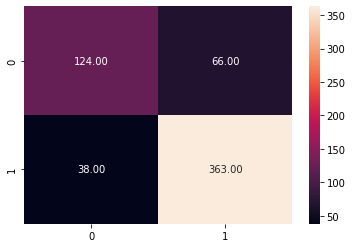

In [58]:
cm = metrics.confusion_matrix(test_y, test_ds_predicted)
sn.heatmap(cm, annot=True, fmt = '.2f')

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y, test_ds_predicted)

0.8240270727580372